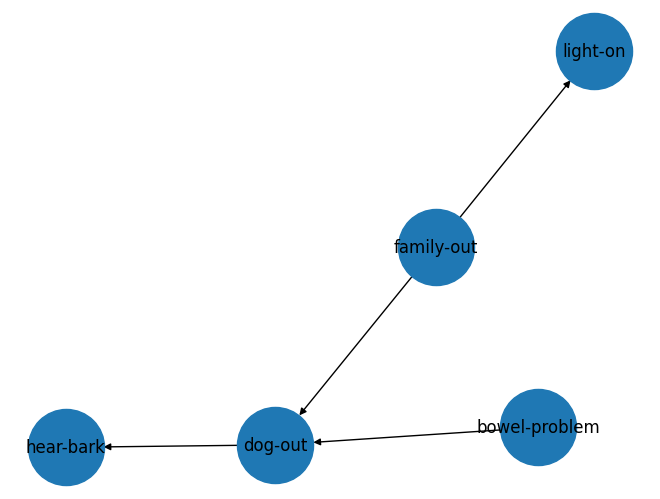

all_vars: 
['light-on', 'bowel-problem', 'dog-out', 'hear-bark', 'family-out']
chilren of bowel-problem: 
['dog-out']
one cpt: 


,dog-out,hear-bark,p
0,False,False,0.70
1,False,True,0.30
2,True,False,0.01
3,True,True,0.99


,hear-bark,p
0,False,0.71
1,True,1.29


all cpts:


{'light-on':    family-out  light-on     p
 0       False     False  0.60
 1       False      True  0.40
 2        True     False  0.05
 3        True      True  0.95,
 'bowel-problem':    bowel-problem     p
 0          False  0.01
 1           True  0.99,
 'dog-out':    family-out  bowel-problem  dog-out     p
 0       False          False    False  0.99
 1       False          False     True  0.01
 2       False           True    False  0.97
 3       False           True     True  0.03
 4        True          False    False  0.90
 5        True          False     True  0.10
 6        True           True    False  0.30
 7        True           True     True  0.70,
 'hear-bark':    dog-out  hear-bark     p
 0    False      False  0.70
 1    False       True  0.30
 2     True      False  0.01
 3     True       True  0.99,
 'family-out':    family-out     p
 0       False  0.15
 1        True  0.85}

In [4]:
from BayesNet import BayesNet
from tests.conftest import DOG_FILE, LEC1_FILE, LEC2_FILE
import pandas as pd

net = BayesNet()
net.load_from_bifxml(DOG_FILE)

#net.get_interaction_graph()

net.draw_structure()

print('all_vars: ')
print(net.get_all_variables())
print('chilren of bowel-problem: ')
print(net.get_children('bowel-problem'))

print('one cpt: ')
display(net.get_cpt('hear-bark'))

display(pd.DataFrame(
  {
      "hear-bark": [False, True],
      "p": [0.70 + 0.01, 0.99 + 0.3],
  }
))


print('all cpts:')
net.get_all_cpts()



LEC1:


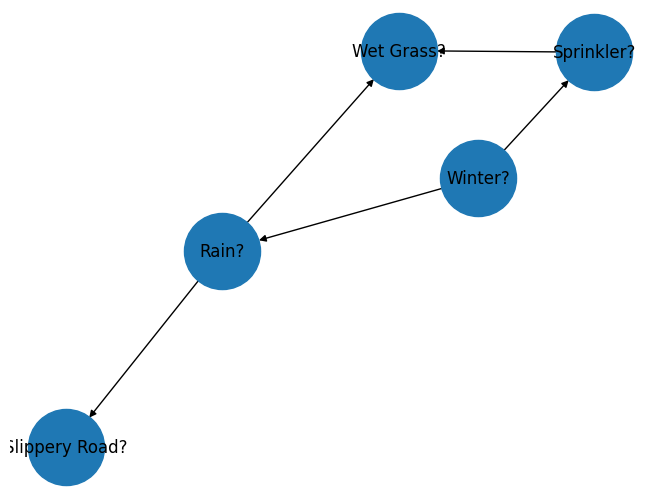

all cpts:
Winter?


,Winter?,p
0,False,0.4
1,True,0.6


Sprinkler?


,Winter?,Sprinkler?,p
0,False,False,0.25
1,False,True,0.75
2,True,False,0.80
3,True,True,0.20


Rain?


,Winter?,Rain?,p
0,False,False,0.9
1,False,True,0.1
2,True,False,0.2
3,True,True,0.8


Wet Grass?


,Sprinkler?,Rain?,Wet Grass?,p
0,False,False,False,1.00
1,False,False,True,0.00
2,False,True,False,0.20
3,False,True,True,0.80
4,True,False,False,0.10
5,True,False,True,0.90
6,True,True,False,0.05
7,True,True,True,0.95


Slippery Road?


,Rain?,Slippery Road?,p
0,False,False,1.0
1,False,True,0.0
2,True,False,0.3
3,True,True,0.7



LEC2:


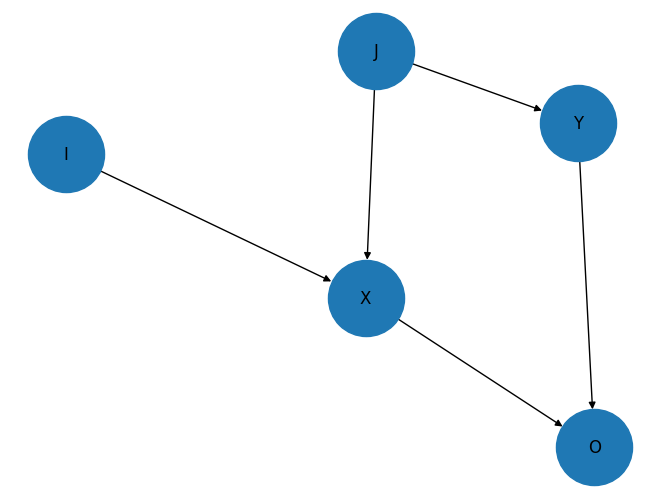

all cpts:
I


,I,p
0,False,0.5
1,True,0.5


J


,J,p
0,False,0.5
1,True,0.5


Y


,J,Y,p
0,False,False,0.01
1,False,True,0.99
2,True,False,0.99
3,True,True,0.01


X


,J,I,X,p
0,False,False,False,0.95
1,False,False,True,0.05
2,False,True,False,0.95
3,False,True,True,0.05
4,True,False,False,0.95
5,True,False,True,0.05
6,True,True,False,0.05
7,True,True,True,0.95


O


,Y,X,O,p
0,False,False,False,0.98
1,False,False,True,0.02
2,False,True,False,0.02
3,False,True,True,0.98
4,True,False,False,0.02
5,True,False,True,0.98
6,True,True,False,0.02
7,True,True,True,0.98


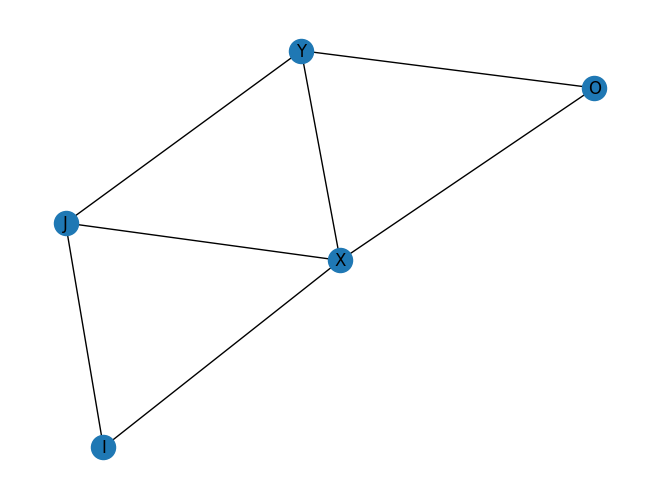

In [21]:
from BNReasoner import BNReasoner
from BayesNet import BayesNet
import networkx as nx
import matplotlib.pyplot as plt

def visualize(br: BayesNet, show_cpts=True):
    br.bn.draw_structure()
    int_graph = br.bn.get_interaction_graph()
    nx.draw(int_graph, with_labels=True)

    if show_cpts:
        print('all cpts:')
        cpts =br.bn.get_all_cpts()
        for k, cpt in cpts.items():
            print(f"{k}")
            display(cpt)

print("\nLEC1:")
br1 = BNReasoner(LEC1_FILE)
visualize(br1)

plt.clf()
print("\nLEC2:")
br2 = BNReasoner(LEC2_FILE)
visualize(br2)


In [6]:
import pandas as pd

df1 = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df2 = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
#df1.merge(df2, how='outer', on=df1.columns)

In [11]:
#0.55*0.05*0.8 + 0.55*0.95*0.2
row1 = 0.55*0.05*0.8
row2 = 0.55*0.05*0.2
row5 = 0.55*0.95*0.2
row6 = 0.55*0.95*0.8

(row1+ row5) / (row1 + row2 + row5 + row6)

0.22999999999999998

In [12]:
(row2+ row6) / (row1 + row2 + row5 + row6)

0.7699999999999999